# Trabajo 3: Técnicas de Regresión Avanzadas

**Integrantes:**

- Valeria Mondragón Roldán - 1001018171
- Marlon Steven Orrego Restrepo - 1000413740

**Instrucciones:**

- Modifique el nombre de este archivo con los nombres de los integrantes.
- Agrege los nombres y documentos de los integrantes del equipo en la sección de arriba.
- Resuelva la situación planteada cumpliendo los criterios de aceptación. Estos criterios son los que determinarán su calificación.
- Entregue **únicamente** este notebook. No se aceptarán otro tipo de entregas.

## Criterios de aceptación

1. **(20%)** Realice un análisis descriptivo de los datos
2. **(30%)** Realice el pre-procesamiento de los datos
3. **(25%)** Pruebe algunas técnicas avanzadas de regresión
4. **(25%)** Una vez tenga un modelo candidato, realice el entrenamiento de hiperparámetros para ajustar el modelo.

# Problema: Precio Final de Vivienda en Ames, Iowa.

Pídale a un comprador que describa la casa de sus sueños y probablemente no comenzará con la altura del techo del sótano o la proximidad a una vía de ferrocarril de este a oeste. Pero el conjunto de datos de esta competición de parques infantiles demuestra que en las negociaciones de precios influye mucho más que el número de dormitorios o una valla blanca.

Con 79 variables explicativas que describen (casi) todos los aspectos de las viviendas residenciales en Ames, Iowa, esta competencia lo desafía a predecir el precio final de cada vivienda.

## Descripción del Dataset

### Descripción de los archivos

* **train.csv** : set de datos de entrenamiento
* **test.csv** : set de datos de testeo
* **data_description.txt** : Descripción completa de cada columna, preparada originalmente por Dean De Cock pero ligeramente editada para que coincida con los nombres de las columnas utilizadas aquí.

### Data fields

Aquí tienes una versión breve (en inglés) de lo que encontrarás en el archivo de descripción de datos.

- **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.
- **MSSubClass**: The building class
- **MSZoning**: The general zoning classification
- **LotFrontage**: Linear feet of street connected to property
- **LotArea**: Lot size in square feet
- **Street**: Type of road access
- **Alley**: Type of alley access
- **LotShape**: General shape of property
- **LandContour**: Flatness of the property
- **Utilities**: Type of utilities available
- **LotConfig**: Lot configuration
- **LandSlope**: Slope of property
- **Neighborhood**: Physical locations within Ames city limits
- **Condition1**: Proximity to main road or railroad
- **Condition2**: Proximity to main road or railroad (if a second is present)
- **BldgType**: Type of dwelling
- **HouseStyle**: Style of dwelling
- **OverallQual**: Overall material and finish quality
- **OverallCond**: Overall condition rating
- **YearBuilt**: Original construction date
- **YearRemodAdd**: Remodel date
- **RoofStyle**: Type of roof
- **RoofMatl**: Roof material
- **Exterior1st**: Exterior covering on house
- **Exterior2nd**: Exterior covering on house (if more than one material)
- **MasVnrType**: Masonry veneer type
- **MasVnrArea**: Masonry veneer area in square feet
- **ExterQual**: Exterior material quality
- **ExterCond**: Present condition of the material on the exterior
- **Foundation**: Type of foundation
- **BsmtQual**: Height of the basement
- **BsmtCond**: General condition of the basement
- **BsmtExposure**: Walkout or garden level basement walls
- **BsmtFinType1**: Quality of basement finished area
- **BsmtFinSF1**: Type 1 finished square feet
- **BsmtFinType2**: Quality of second finished area (if present)
- **BsmtFinSF2**: Type 2 finished square feet
- **BsmtUnfSF**: Unfinished square feet of basement area
- **TotalBsmtSF**: Total square feet of basement area
- **Heating**: Type of heating
- **HeatingQC**: Heating quality and condition
- **CentralAir**: Central air conditioning
- **Electrical**: Electrical system
- **1stFlrSF**: First Floor square feet
- **2ndFlrSF**: Second floor square feet
- **LowQualFinSF**: Low quality finished square feet (all floors)
- **GrLivArea**: Above grade (ground) living area square feet
- **BsmtFullBath**: Basement full bathrooms
- **BsmtHalfBath**: Basement half bathrooms
- **FullBath**: Full bathrooms above grade
- **HalfBath**: Half baths above grade
- **Bedroom**: Number of bedrooms above basement level
- **Kitchen**: Number of kitchens
- **KitchenQual**: Kitchen quality
- **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)
- **Functional**: Home functionality rating
- **Fireplaces**: Number of fireplaces
- **FireplaceQu**: Fireplace quality
- **GarageType**: Garage location
- **GarageYrBlt**: Year garage was built
- **GarageFinish**: Interior finish of the garage
- **GarageCars**: Size of garage in car capacity
- **GarageArea**: Size of garage in square feet
- **GarageQual**: Garage quality
- **GarageCond**: Garage condition
- **PavedDrive**: Paved driveway
- **WoodDeckSF**: Wood deck area in square feet
- **OpenPorchSF**: Open porch area in square feet
- **EnclosedPorch**: Enclosed porch area in square feet
- **3SsnPorch**: Three season porch area in square feet
- **ScreenPorch**: Screen porch area in square feet
- **PoolArea**: Pool area in square feet
- **PoolQC**: Pool quality
- **Fence**: Fence quality
- **MiscFeature**: Miscellaneous feature not covered in other categories
- **MiscVal**: $Value of miscellaneous feature
- **MoSold**: Month Sold
- **YrSold**: Year Sold
- **SaleType**: Type of sale
- **SaleCondition**: Condition of sale

# Análisis descriptivo de los datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
df_train= pd.read_csv('train.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df_test= pd.read_csv('test.csv')
df_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [5]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [7]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


KeyboardInterrupt



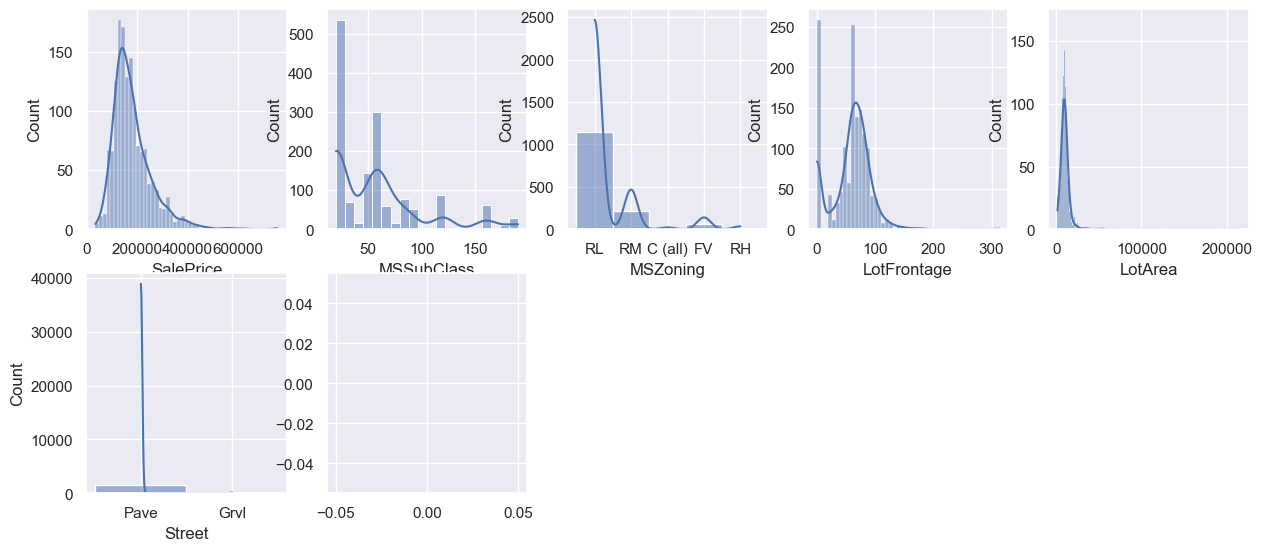

In [11]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['SalePrice','MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','Bedroom','Kitchen','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch' ,'ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature','MiscVal','MoSold','YrSold','SaleType','SaleCondition']
cnt = 1
for col in cols :
    plt.subplot(6,5,cnt)
    sns.histplot(df_train[col], kde = True)
    cnt+=1
plt.show()


In [ ]:
sns.set()
fig = plt.figure(figsize = [15,20])
cols = ['SalePrice','MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','Bedroom','Kitchen','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch' ,'ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature','MiscVal','MoSold','YrSold','SaleType','SaleCondition']
cnt = 1
for col in cols :
    plt.subplot(6,5,cnt)
    sns.histplot(df_test[col], kde = True)
    cnt+=1
plt.show()

In [ ]:
fig = plt.figure(figsize = [15,20])
cols = ['SalePrice','MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','Bedroom','Kitchen','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch' ,'ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature','MiscVal','MoSold','YrSold','SaleType','SaleCondition']
cnt = 1
for col in cols :
    plt.subplot(6,5,cnt)
    sns.barplot(data = df_train, x = 'SalePrice', y = col).set(title='{0} vs SalePrice'.format(col))
    cnt+=1
plt.show() 

In [ ]:
fig = plt.figure(figsize = [15,20])
cols = ['SalePrice','MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','YearBuilt','YearRemodAdd','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','Bedroom','Kitchen','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu','GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch' ,'ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature','MiscVal','MoSold','YrSold','SaleType','SaleCondition']
cnt = 1
for col in cols :
    plt.subplot(6,5,cnt)
    sns.barplot(data = df_test, x = 'SalePrice', y = col).set(title='{0} vs SalePrice'.format(col))
    cnt+=1
plt.show() 

In [ ]:
sns.pairplot(df_train)
plt.show()

In [ ]:
sns.pairplot(df_test)
plt.show()

In [ ]:
fig = plt.figure(figsize = [15,10])
sns.heatmap(df_train.corr(),annot = True, cmap = 'Blues', center = 0)
plt.show()

In [ ]:
fig = plt.figure(figsize = [15,10])
sns.heatmap(df_test.corr(),annot = True, cmap = 'Blues', center = 0)
plt.show()

# Limpieza De datos Entrenamiento

## Sumatoria de datos Nulos

In [4]:
nas = df_train.isna().sum()
nas[nas>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [5]:
cols = ['Alley', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
df_train[cols] = df_train[cols].fillna('None')

In [6]:
nas = df_train.isna().sum()
nas[nas>0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageYrBlt      81
dtype: int64

In [7]:
df_train.loc[(df_train['BsmtExposure'].isna()) & (df_train['TotalBsmtSF']>0),'BsmtExposure'] = 'No'
df_train.loc[(df_train['BsmtFinType2'].isna()) & (df_train['TotalBsmtSF']>0),'BsmtFinType2'] = 'Unf'
cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df_train[cols] = df_train[cols].fillna('None')

In [8]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_train.loc[:,'Electrical'] = imp.fit_transform(np.array(df_train['Electrical']).reshape(-1,1))


In [9]:
df_train['MasVnrType'] = df_train['MasVnrType'].fillna('None')
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)

In [10]:
df_train.loc[df_train['GarageYrBlt'].isna(),'GarageYrBlt'] = df_train.loc[df_train['GarageYrBlt'].isna(),'YearBuilt']

In [11]:
df_train.loc[df_train['LotFrontage'].isna(),'LotFrontage'] = 0

In [12]:
nas = df_train.isna().sum()
nas[nas>0]

Series([], dtype: int64)

# Limpieza De datos Nuevos

## Sumatoria de datos Nulos

In [13]:
nas = df_test.isna().sum()
nas[nas>0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [14]:
cols = ['Alley','FireplaceQu','PoolQC','Fence','MiscFeature','MasVnrType', 'BsmtFinType1', 'BsmtFinType2']
df_test[cols] = df_test[cols].fillna('None')
df_test.loc[df_test['SaleType'].isna(),'SaleType'] = 'Oth'

In [15]:
nas = df_test.isna().sum()
nas[nas>0]

MSZoning          4
LotFrontage     227
Utilities         2
Exterior1st       1
Exterior2nd       1
MasVnrArea       15
BsmtQual         44
BsmtCond         45
BsmtExposure     44
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
KitchenQual       1
Functional        2
GarageType       76
GarageYrBlt      78
GarageFinish     78
GarageCars        1
GarageArea        1
GarageQual       78
GarageCond       78
dtype: int64

In [16]:
df_test.loc[(df_test['BsmtExposure'].isna()) & (df_test['TotalBsmtSF']>0),'BsmtExposure'] = 'No'
df_test.loc[(df_test['BsmtFinType2'].isna()) & (df_test['TotalBsmtSF']>0),'BsmtFinType2'] = 'Unf'
cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
df_test[cols] = df_test[cols].fillna('None')

In [17]:
cols = ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath',
       'GarageCars','GarageArea']
df_test[cols] = df_test[cols].fillna(0)

In [18]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
cols = ['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional']
df_test[cols] = imp.fit_transform(df_test[cols])

In [19]:
df_test.loc[(df_test['GarageFinish'].isna()) & (df_test['GarageArea']>0),'GarageFinish'] = 'Unf'
df_test.loc[(df_test['GarageQual'].isna()) & (df_test['GarageArea']>0),'GarageQual'] = df_test['GarageQual'].value_counts().idxmax()
df_test.loc[(df_test['GarageCond'].isna()) & (df_test['GarageArea']>0),'GarageCond'] = df_test['GarageCond'].value_counts().idxmax()
df_test.loc[(~df_test['GarageType'].isna()) & (df_test['GarageArea'] == 0),'GarageType'] = 'None'
cols = ['GarageType','GarageFinish','GarageQual','GarageCond']
df_test[cols] = df_test[cols].fillna('None')
df_test.loc[df_test['GarageYrBlt'].isna(),'GarageYrBlt'] = df_test.loc[df_test['GarageYrBlt'].isna(),'YearBuilt']


# Pre Procesamiento de Datos Train

In [20]:
#encoding ordinal features
df_train = df_train.replace({'LotShape' : {'Reg' : 0, 'IR1' : 1, 'IR2' : 2, 'IR3' : 3},
                'Utilities' : {'AllPub' : 4, 'NoSewr' : 3, 'NoSeWa' : 2, 'ELO' : 1},
                'LandSlope' : {'Gtl' : 1, 'Mod' : 2, 'Sev' : 3},
                'ExterQual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1},
                'ExterCond' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1},
                'BsmtQual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0},
                'BsmtCond' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0},
                'BsmtExposure' : {'Gd' : 4, 'Av' : 3, 'Mn' : 2, 'No' : 1, 'None' : 0},
                'BsmtFinType1' : {'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'None' : 0},
                'BsmtFinType2' : {'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'None' : 0},
                'HeatingQC' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1},
                'Electrical' : {'SBrkr' : 5, 'FuseA' : 4, 'FuseF' : 3, 'FuseP' : 2, 'Mix' : 1},
                'KitchenQual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1},
                'Functional' : {'Typ' : 8, 'Min1' : 7, 'Min2' : 6, 'Mod' : 5, 'Maj1' : 4, 'Maj2' : 3, 'Sev' : 2, 'Sal' : 1},
                'FireplaceQu' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0},
                'GarageFinish' : {'Fin' : 3, 'RFn' : 2, 'Unf' : 1, 'None' : 0},
                'GarageQual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0},
                'GarageCond' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0},
                'PavedDrive' : {'Y' : 2, 'P' : 1, 'N' : 0},
                'PoolQC' : {'Ex' : 4, 'Gd' : 3, 'TA' : 2, 'Fa' : 1, 'None' : 0},
                'Fence' : {'GdPrv' : 4, 'MnPrv' : 3, 'GdWo' : 2, 'MnWw' : 1, 'None' : 0},
                })

In [21]:
#encoding nominal features
df2 = pd.concat([df_train,pd.get_dummies(df_train['MSSubClass'],prefix='SubClass',drop_first=True)],axis=1)
df3 = pd.concat([df2,pd.get_dummies(df2[['MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood',
                                        'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
                                        'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir',
                                        'GarageType','MiscFeature','SaleType','SaleCondition']],drop_first=True)],axis=1)
df4 = df3.drop(columns=['MSSubClass','MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood',
                                        'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
                                        'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir',
                                        'GarageType','MiscFeature','SaleType','SaleCondition'])

In [22]:
#drop Id column
data_train_clean = df4.drop(columns='Id')
data_train_clean

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,0,4,1,7,5,2003,2003,196.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,0,4,1,6,8,1976,1976,0.0,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,1,4,1,7,5,2001,2002,162.0,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,1,4,1,7,5,1915,1970,0.0,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,1,4,1,8,5,2000,2000,350.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0,4,1,6,5,1999,2000,0.0,...,0,0,0,0,1,0,0,0,1,0
1456,85.0,13175,0,4,1,6,6,1978,1988,119.0,...,0,0,0,0,1,0,0,0,1,0
1457,66.0,9042,0,4,1,7,9,1941,2006,0.0,...,0,0,0,0,1,0,0,0,1,0
1458,68.0,9717,0,4,1,5,6,1950,1996,0.0,...,0,0,0,0,1,0,0,0,1,0


# Pre procesamiento de datos Nuevos

In [23]:
#encoding ordinal features
data_test = df_test.replace({'LotShape' : {'Reg' : 0, 'IR1' : 1, 'IR2' : 2, 'IR3' : 3},
                'Utilities' : {'AllPub' : 4, 'NoSewr' : 3, 'NoSeWa' : 2, 'ELO' : 1},
                'LandSlope' : {'Gtl' : 1, 'Mod' : 2, 'Sev' : 3},
                'ExterQual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1},
                'ExterCond' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1},
                'BsmtQual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0},
                'BsmtCond' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0},
                'BsmtExposure' : {'Gd' : 4, 'Av' : 3, 'Mn' : 2, 'No' : 1, 'None' : 0},
                'BsmtFinType1' : {'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'None' : 0},
                'BsmtFinType2' : {'GLQ' : 6, 'ALQ' : 5, 'BLQ' : 4, 'Rec' : 3, 'LwQ' : 2, 'Unf' : 1, 'None' : 0},
                'HeatingQC' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1},
                'Electrical' : {'SBrkr' : 5, 'FuseA' : 4, 'FuseF' : 3, 'FuseP' : 2, 'Mix' : 1},
                'KitchenQual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1},
                'Functional' : {'Typ' : 8, 'Min1' : 7, 'Min2' : 6, 'Mod' : 5, 'Maj1' : 4, 'Maj2' : 3, 'Sev' : 2, 'Sal' : 1},
                'FireplaceQu' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0},
                'GarageFinish' : {'Fin' : 3, 'RFn' : 2, 'Unf' : 1, 'None' : 0},
                'GarageQual' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0},
                'GarageCond' : {'Ex' : 5, 'Gd' : 4, 'TA' : 3, 'Fa' : 2, 'Po' : 1, 'None' : 0},
                'PavedDrive' : {'Y' : 2, 'P' : 1, 'N' : 0},
                'PoolQC' : {'Ex' : 4, 'Gd' : 3, 'TA' : 2, 'Fa' : 1, 'None' : 0},
                'Fence' : {'GdPrv' : 4, 'MnPrv' : 3, 'GdWo' : 2, 'MnWw' : 1, 'None' : 0},
                })

In [24]:
#encoding nominal features
dt2 = pd.concat([data_test,pd.get_dummies(data_test['MSSubClass'],prefix='SubClass',drop_first=True)],axis=1)
dt3 = pd.concat([data_test,pd.get_dummies(dt2[['MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood',
                                        'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
                                        'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir',
                                        'GarageType','MiscFeature','SaleType','SaleCondition']],drop_first=True)],axis=1)
dt4 = dt3.drop(columns=['MSSubClass','MSZoning','Street','Alley','LandContour','LotConfig','Neighborhood',
                                        'Condition1','Condition2','BldgType','HouseStyle','RoofStyle','RoofMatl',
                                        'Exterior1st','Exterior2nd','MasVnrType','Foundation','Heating','CentralAir',
                                        'GarageType','MiscFeature','SaleType','SaleCondition'])
dt4['Exterior1st_Stone'] = np.zeros(len(dt4))
dt4

,Id,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Exterior1st_Stone
0,1461,80.0,11622,0,4,1,5,6,1961,1961,...,0,0,0,1,0,0,0,1,0,0.0
1,1462,81.0,14267,1,4,1,6,6,1958,1958,...,0,0,0,1,0,0,0,1,0,0.0
2,1463,74.0,13830,1,4,1,5,5,1997,1998,...,0,0,0,1,0,0,0,1,0,0.0
3,1464,78.0,9978,1,4,1,6,6,1998,1998,...,0,0,0,1,0,0,0,1,0,0.0
4,1465,43.0,5005,1,4,1,8,5,1992,1992,...,0,0,0,1,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,21.0,1936,0,4,1,4,7,1970,1970,...,0,0,0,1,0,0,0,1,0,0.0
1455,2916,21.0,1894,0,4,1,4,5,1970,1970,...,0,0,0,1,0,0,0,0,0,0.0
1456,2917,160.0,20000,0,4,1,5,7,1960,1996,...,0,0,0,1,0,0,0,0,0,0.0
1457,2918,62.0,10441,0,4,1,5,5,1992,1992,...,0,0,0,1,0,0,0,1,0,0.0


In [25]:
#drop Id column
data_test_clean = dt4.drop(columns='Id')
data_test_clean

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,Exterior1st_Stone
0,80.0,11622,0,4,1,5,6,1961,1961,0.0,...,0,0,0,1,0,0,0,1,0,0.0
1,81.0,14267,1,4,1,6,6,1958,1958,108.0,...,0,0,0,1,0,0,0,1,0,0.0
2,74.0,13830,1,4,1,5,5,1997,1998,0.0,...,0,0,0,1,0,0,0,1,0,0.0
3,78.0,9978,1,4,1,6,6,1998,1998,20.0,...,0,0,0,1,0,0,0,1,0,0.0
4,43.0,5005,1,4,1,8,5,1992,1992,0.0,...,0,0,0,1,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,0,4,1,4,7,1970,1970,0.0,...,0,0,0,1,0,0,0,1,0,0.0
1455,21.0,1894,0,4,1,4,5,1970,1970,0.0,...,0,0,0,1,0,0,0,0,0,0.0
1456,160.0,20000,0,4,1,5,7,1960,1996,0.0,...,0,0,0,1,0,0,0,0,0,0.0
1457,62.0,10441,0,4,1,5,5,1992,1992,0.0,...,0,0,0,1,0,0,0,1,0,0.0


# Construir Modelo Predictivo

In [26]:
def calc_scores(model, X_train, y_train, X_test, y_test):
    return print ('Train score  ' + str(model.score (X_train, y_train))  + '\n' +
                  'Test score   ' + str(model.score (X_test, y_test)) + '\n' +
                  'Baseline     ' + str(cross_val_score (model, X_train, y_train).mean()))


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
X = data_train_clean.drop('SalePrice',axis=1)
y = data_train_clean['SalePrice']

Text(0.5, 1.0, 'Feature importances based on regression')

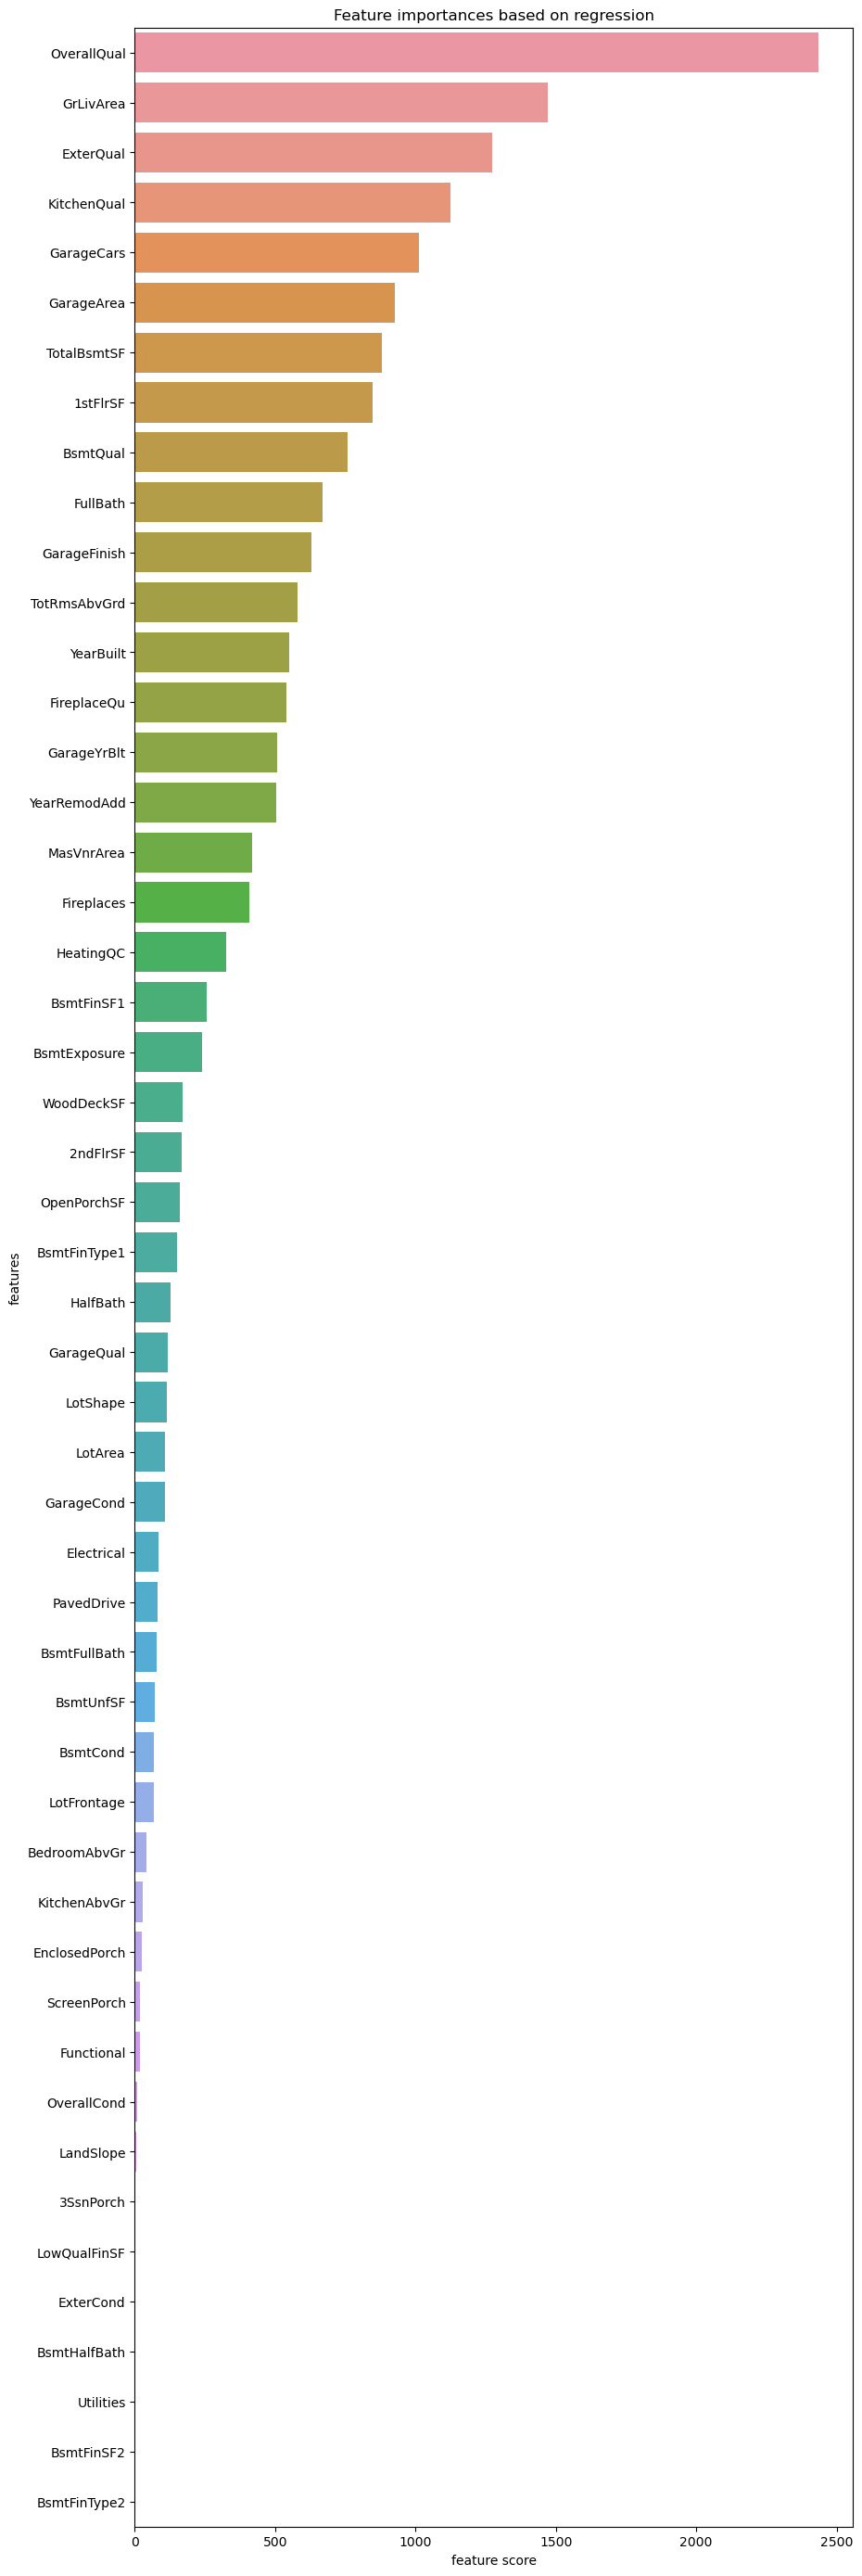

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from pandas import Series, DataFrame

fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X,y)
indices = np.argsort(fs.scores_)[::-1]
cc = DataFrame({'feature score':Series(fs.scores_),'features':Series(X.columns)})    
plt.figure(figsize=(10,35))
sns.barplot(x='feature score',y='features',data=cc.head(50).sort_values(by='feature score',ascending=False))
plt.title('Feature importances based on regression')

In [29]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_std=scaler.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X_std, y, random_state=42)


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([("scaler", StandardScaler()), ("reg", LinearRegression())])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

Text(0, 0.5, 'SalePrice (predicted)')

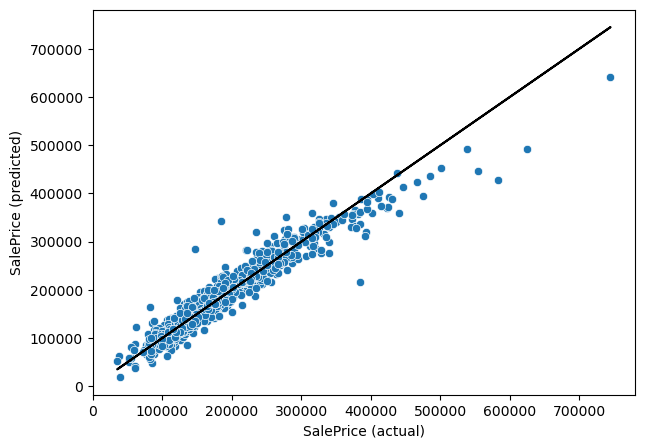

In [34]:
y_pred = pipe.predict(X_train)
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_train,y=y_pred)
plt.plot(y_train,y_train,color='k')
plt.xlabel('SalePrice (actual)')
plt.ylabel('SalePrice (predicted)')

In [35]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train,y_pred)
print("Score Train",r2_train)

Score Train 0.9214010269042263


In [37]:
y_pred_test=pipe.predict(X_test)

In [38]:
r2_train = r2_score(y_test,y_pred_test)
print("Score Test",r2_train)

Score Test -2.965193622867101e+24


Text(0, 0.5, 'SalePrice (predicted)')

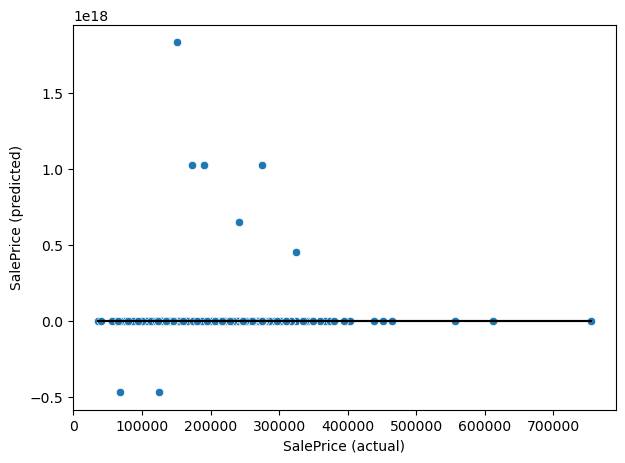

In [40]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test,y=y_pred_test)
plt.plot(y_test,y_test,color='k')
plt.xlabel('SalePrice (actual)')
plt.ylabel('SalePrice (predicted)')

# Entrenando Modelo con Hiperparametros

In [56]:
from sklearn.metrics import mean_squared_log_error, make_scorer

def funct(y_true,y_pred):
    y_new = np.maximum(y_pred,np.zeros(len(y_pred)))
    t = mean_squared_log_error(y_true,y_new)
    return np.sqrt(t)

RMSLE = make_scorer(funct, greater_is_better=False)

In [57]:
from sklearn.ensemble import ExtraTreesRegressor
forest = ExtraTreesRegressor(random_state=0,n_jobs=4,n_estimators=500)
param_grid = {'min_samples_split': [2, 3, 4], 'max_depth' : [40, 50]}
grid = GridSearchCV(forest, param_grid=param_grid, cv=5, scoring=RMSLE)
grid.fit(X_train,y_train)
print('Best hyperparameter: ', grid.best_params_)
print('Best cross validation score: ', -grid.best_score_)

Best hyperparameter:  {'max_depth': 40, 'min_samples_split': 3}
Best cross validation score:  0.14654195918046206


Text(0, 0.5, 'SalePrice (predicted)')

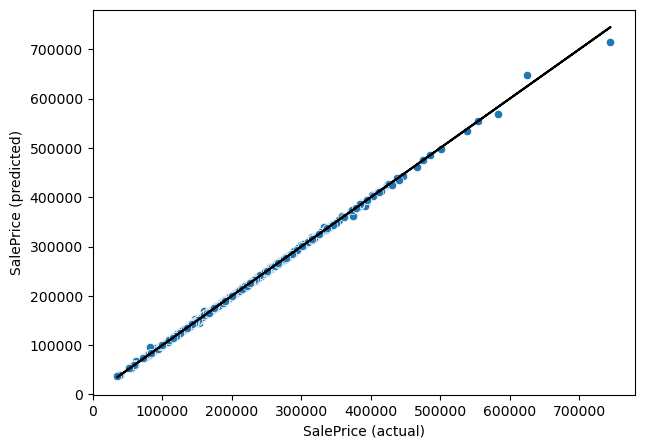

In [58]:
y_pred_train_h = grid.predict(X_train)
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_train,y=y_pred_train_h)
plt.plot(y_train,y_train,color='k')
plt.xlabel('SalePrice (actual)')
plt.ylabel('SalePrice (predicted)')

In [59]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train,y_pred)
print("Score Train",r2_train)

Score Train 0.9214010269042263


In [60]:
y_pred_test_h=grid.predict(X_test)

In [61]:
r2_train = r2_score(y_test,y_pred_test_h)
print("Score Test",r2_train)

Score Test 0.8960453297087438


Text(0, 0.5, 'SalePrice (predicted)')

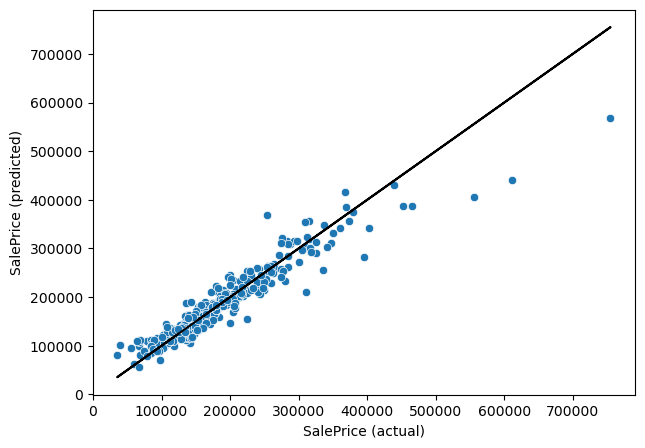

In [64]:
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test,y=y_pred_test_h)
plt.plot(y_test,y_test,color='k')
plt.xlabel('SalePrice (actual)')
plt.ylabel('SalePrice (predicted)')

# Predecir Valores Nuevos

In [47]:
X_new_pred = data_test_clean

In [51]:
#Obtén la lista de columnas después de la dumificación en ambos dataframes
train_columns = X.columns.tolist()
test_columns = X_new_pred.columns.tolist()

#Encuentra las columnas que están presentes en df_train pero no en df_test
missing_in_test = set(train_columns) - set(test_columns)

#Encuentra las columnas que están presentes en df_test pero no en df_train
missing_in_train = set(test_columns) - set(train_columns)

#Agrega columnas faltantes en df_test y df_train y llénalas con ceros
for col in missing_in_test:
    X_new_pred[col] = 0

for col in missing_in_train:
    X[col] = 0

#Reordena las columnas en df_test para que coincidan con el orden en df_train
X_new_pred = X_new_pred[train_columns]
X_new_pred

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,80.0,11622,0,4,1,5,6,1961,1961,0.0,...,0,0,0,0,1,0,0,0,1,0
1,81.0,14267,1,4,1,6,6,1958,1958,108.0,...,0,0,0,0,1,0,0,0,1,0
2,74.0,13830,1,4,1,5,5,1997,1998,0.0,...,0,0,0,0,1,0,0,0,1,0
3,78.0,9978,1,4,1,6,6,1998,1998,20.0,...,0,0,0,0,1,0,0,0,1,0
4,43.0,5005,1,4,1,8,5,1992,1992,0.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,0,4,1,4,7,1970,1970,0.0,...,0,0,0,0,1,0,0,0,1,0
1455,21.0,1894,0,4,1,4,5,1970,1970,0.0,...,0,0,0,0,1,0,0,0,0,0
1456,160.0,20000,0,4,1,5,7,1960,1996,0.0,...,0,0,0,0,1,0,0,0,0,0
1457,62.0,10441,0,4,1,5,5,1992,1992,0.0,...,0,0,0,0,1,0,0,0,1,0


In [55]:
X_new_pred_str= scaler.fit_transform(X_new_pred)
y_new_pred=grid.predict(X_new_pred_str)

array([119993.46813529, 206504.33082   , 165467.00912348, ...,
       167520.48614027, 104746.35618602, 214319.36630487])

In [58]:
final = pd.concat([df_test, Series(y_new_pred,name='SalePrice')], axis=1)
final

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,None,0,6,2010,WD,Normal,119993.468135
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Gar2,12500,6,2010,WD,Normal,206504.330820
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,None,0,3,2010,WD,Normal,165467.009123
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,6,2010,WD,Normal,165989.978176
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,...,0,None,None,None,0,1,2010,WD,Normal,234308.012437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,6,2006,WD,Normal,79174.702869
1455,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2006,WD,Abnorml,79641.415698
1456,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,9,2006,WD,Abnorml,167520.486140
1457,2918,85,RL,62.0,10441,Pave,None,Reg,Lvl,AllPub,...,0,None,MnPrv,Shed,700,7,2006,WD,Normal,104746.356186
